### import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import warnings
import pickle

In [2]:
warnings.filterwarnings(action="ignore")
pd.options.display.max_columns = None

## Read data

In [3]:
def readCsvFile(filepath):
    """
        Function to read csv file
        args:
            filepath : path to csv file
        return:
            df : dataframe
    """
    
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    
    df.drop(df.columns[-1], inplace=True, axis = 1)
    
    return df

In [4]:
raw_aid_df = readCsvFile('../data/API_DT.ODA.ALLD.CD_DS2_en_csv_v2_5362759.csv')
raw_infltn_df = readCsvFile("../data/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5358428.csv")
raw_pvrty_df = readCsvFile("../data/API_SI.POV.DDAY_DS2_en_csv_v2_5358982.csv")
raw_unemplmnt_df = readCsvFile("../data/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5358416.csv")
cntry_code_dtl = readCsvFile('../data/country_code_dtls.csv')

In [5]:
with open("../data/latin_america_southeast_asia_usaid_complete.pickle", "rb") as file_:
    raw_us_aid = pickle.load(file_)

# EDA

In [6]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America


In [7]:
raw_us_aid['fiscal_year'] = np.where(raw_us_aid.fiscal_year=="1976tq", "1976", raw_us_aid.fiscal_year)

In [8]:
raw_us_aid['fiscal_year'] = raw_us_aid['fiscal_year'].astype(int)

In [9]:
# aid in millions
raw_us_aid['amount_in_mil'] = (raw_us_aid['constant_dollar_amount'].astype(float)/1000000).round(2)

In [10]:
plot_df = raw_us_aid.groupby(['us_category_name', 'fiscal_year','region_extd'])\
                .agg({'amount_in_mil':np.nanmean}).reset_index()

Text(0.5, 1.0, 'Average US Aid to Latin America by Category : 2001 - 2022')

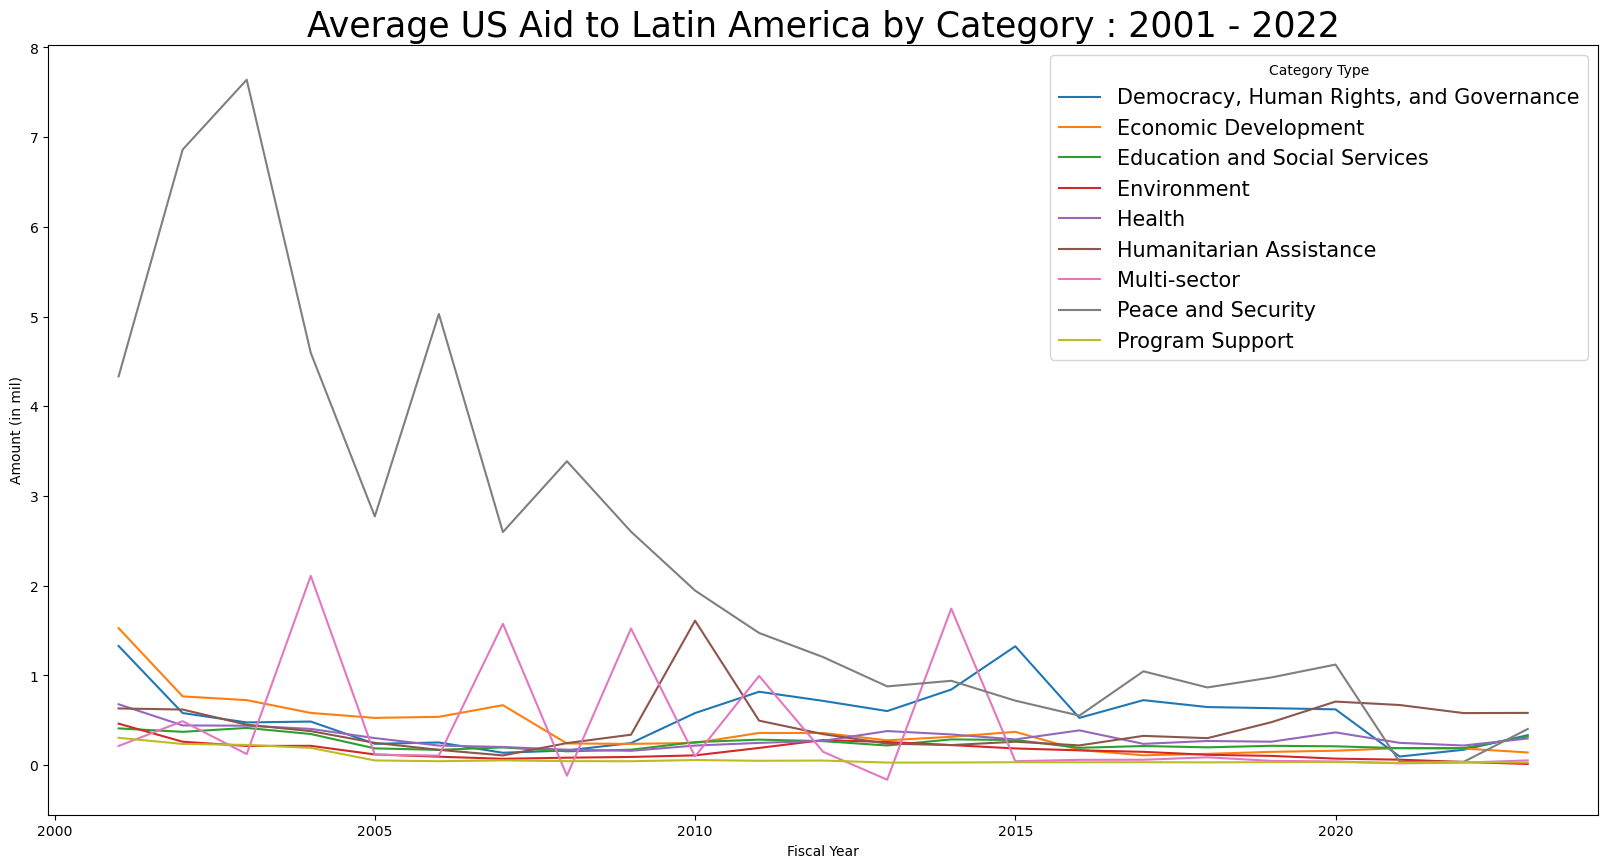

In [11]:
plt.figure(figsize=(20, 10))
sns.lineplot(y = "amount_in_mil", 
            x = "fiscal_year",
             data = plot_df[(plot_df.region_extd=='Latin America') & (plot_df.fiscal_year>2000)], 
            hue = "us_category_name")
plt.xlabel("Fiscal Year")
plt.ylabel("Amount (in mil)")
plt.legend(loc="best", prop={'size': 15}, title="Category Type")
plt.title("Average US Aid to Latin America by Category : 2001 - 2022", fontsize=25)

In [12]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.0
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.0


In [13]:
raw_us_aid.us_category_name.value_counts()

Program Support                            236488
Health                                      75476
Economic Development                        73716
Democracy, Human Rights, and Governance     71508
Peace and Security                          63860
Education and Social Services               44551
Humanitarian Assistance                     39938
Environment                                 31620
Multi-sector                                 2663
Name: us_category_name, dtype: int64

In [14]:
plot_df = raw_us_aid.query("transaction_type_name == 'Disbursements'")\
        .groupby(["fiscal_year", "us_category_name"]).agg({'country_id':"nunique"}).reset_index()\
        .sort_values("fiscal_year", ascending=True)

In [15]:
plot_df.head()

,fiscal_year,us_category_name,country_id
0,2001,"Democracy, Human Rights, and Governance",28
1,2001,Economic Development,26
2,2001,Education and Social Services,21
3,2001,Environment,15
4,2001,Health,20


Text(0.5, 1.0, 'US Aid Recipient Countries by Category')

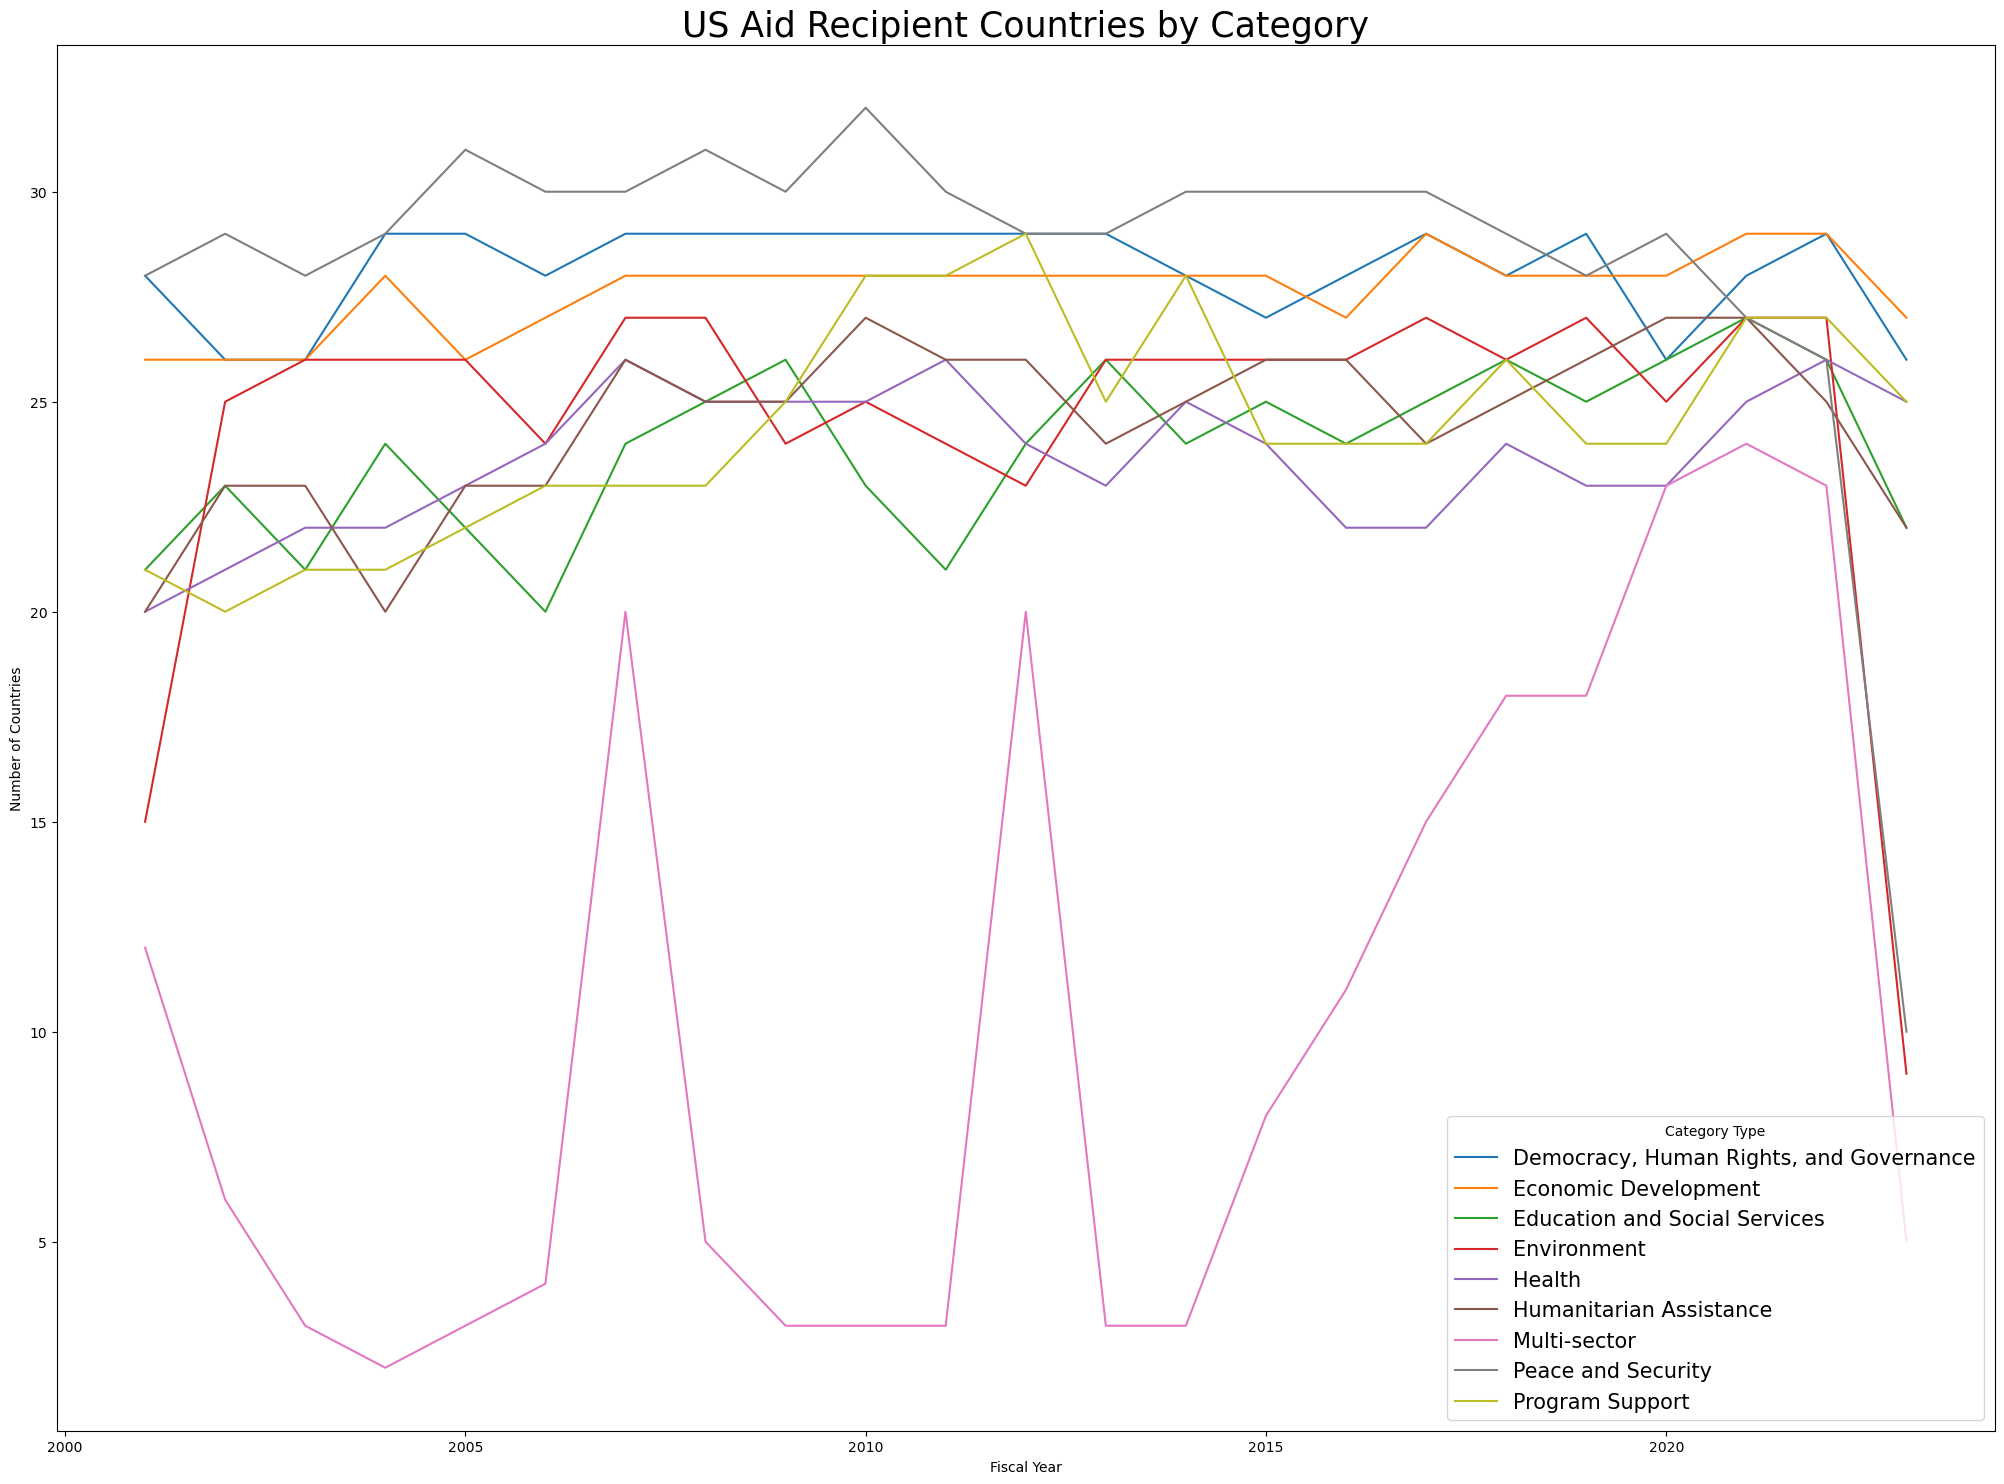

In [16]:
plt.figure(figsize=(25, 18))
sns.lineplot(y = "country_id", 
            x = "fiscal_year",
             data = plot_df, 
            hue = "us_category_name")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Countries")
plt.legend(loc="best", prop={'size': 15}, title="Category Type")
plt.title("US Aid Recipient Countries by Category", fontsize=25)

In [17]:
raw_us_aid[raw_us_aid.fiscal_year==1960]['transaction_type_name'].value_counts()

Obligations    146
Name: transaction_type_name, dtype: int64

In [18]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.0
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.0


In [19]:
tmp_df = raw_us_aid.groupby(["fiscal_year", "transaction_type_name"])\
                    .agg({"funding_agency_acronym":"unique"}).reset_index()

In [20]:
# tmp_df = tmp_df.set_index(['fiscal_year','transaction_type_name']).unstack(fill_value=0).stack().reset_index()

In [21]:
tmp_df['funding_agency_acronym'] = np.where(tmp_df.funding_agency_acronym.isin([0]), 0, 1)

<AxesSubplot:xlabel='fiscal_year', ylabel='constant_dollar_amount'>

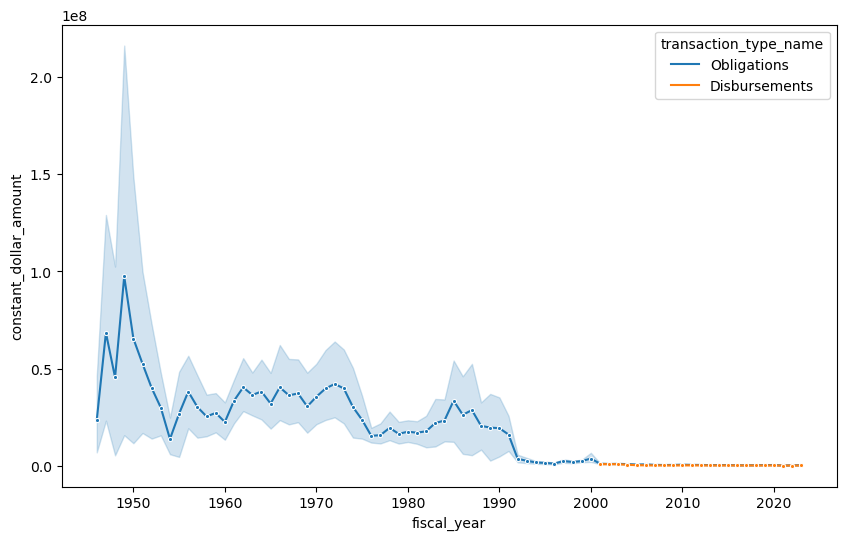

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='fiscal_year', y = "constant_dollar_amount", data = raw_us_aid,
             marker = ".",
             hue = "transaction_type_name")

In [23]:
raw_us_aid.groupby("fiscal_year")\
        .agg({'constant_dollar_amount':[np.nanmin, np.nanmean, np.nanmedian, np.nanmax]}).reset_index()

fiscal_year constant_dollar_amount                                     
                               nanmin       nanmean  nanmedian      nanmax
0         1946                  10895  2.353956e+07  4357895.0   308321053
1         1947                   9823  6.844354e+07  3929249.0   647343831
2         1948                   8972  4.544875e+07  2691489.0   767971631
3         1949               -2603277  9.742930e+07  3471037.0  1549817835
4         1950                   8798  6.546567e+07  3959235.0  1213285549
..         ...                    ...           ...        ...         ...
73        2019              -29280006  1.998736e+05     7208.5   270269506
74        2020              -10000000  2.170955e+05    10000.0   268679844
75        2021               -8439579  9.426396e+04     2445.0    47691527
76        2022               -6011229  1.312358e+05     6541.0    55037317
77        2023               -1420875  1.522202e+05    10089.5    47362509

[78 rows x 5 columns]

# Transformation

In [24]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.0
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.0


In [25]:
raw_us_aid.groupby(['fiscal_year', "us_category_name", "transaction_type_name"]).size().reset_index()

,fiscal_year,us_category_name,transaction_type_name,0
0,1946,Economic Development,Obligations,33
1,1947,Economic Development,Obligations,37
2,1948,Economic Development,Obligations,35
3,1949,Economic Development,Obligations,29
4,1950,Economic Development,Obligations,32
...,...,...,...,...
526,2023,Multi-sector,Disbursements,7
527,2023,Peace and Security,Disbursements,50
528,2023,Peace and Security,Obligations,3
529,2023,Program Support,Disbursements,2320


In [26]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.0
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.0


In [27]:
raw_us_aid.groupby(['country_name', "us_category_name",
                    "transaction_type_name", "foreign_assistance_objective_name"])\
        .agg({'fiscal_year':'unique'}).reset_index()

,country_name,us_category_name,transaction_type_name,foreign_assistance_objective_name,fiscal_year
0,Argentina,"Democracy, Human Rights, and Governance",Disbursements,Economic,"[2016, 2017, 2020, 2011, 2007, 2008, 2005, 200..."
1,Argentina,"Democracy, Human Rights, and Governance",Obligations,Economic,"[2017, 2015, 2012, 2020, 2011, 2007, 2021, 200..."
2,Argentina,Economic Development,Disbursements,Economic,"[2016, 2012, 2021, 2018, 2020, 2019, 2015, 201..."
3,Argentina,Economic Development,Obligations,Economic,"[1963, 1989, 1991, 1992, 1993, 1994, 1959, 196..."
4,Argentina,Economic Development,Obligations,Military,"[1962, 1964, 1965, 1966, 1972, 1963, 1967, 196..."
...,...,...,...,...,...
617,Vietnam,Peace and Security,Disbursements,Military,"[2016, 2006, 2008, 2009, 2010, 2011, 2012, 201..."
618,Vietnam,Peace and Security,Obligations,Economic,"[2008, 2009, 2010, 2013, 2012, 2018, 2011, 201..."
619,Vietnam,Peace and Security,Obligations,Military,"[2006, 2008, 2009, 2010, 2011, 2012, 2013, 201..."
620,Vietnam,Program Support,Disbursements,Economic,"[2015, 2017, 2018, 2019, 2020, 2022, 2008, 202..."


In [28]:
raw_us_aid.transaction_type_name.value_counts()

Disbursements    406864
Obligations      232956
Name: transaction_type_name, dtype: int64

In [29]:
# split the data into transaction types
oblgtn_df = raw_us_aid.query("transaction_type_name == 'Obligations'")
disbrsmnt_df = raw_us_aid.query("transaction_type_name != 'Obligations'")

In [30]:
oblgtn_df.shape, disbrsmnt_df.shape

((232956, 61), (406864, 61))

## Disbursement clustering

In [65]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import silhouette_visualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler

In [32]:
def transformForClustering(data_frame):
    """
        Function to transform the data for clustering task
        args:
            data_frame: dataframe with 'country_name', "us_category_name",
                        "transaction_type_name", "fiscal_year", "constalt_dollar_amount"
        return:
            transformed_df: transformed data for clustering tasl
    """
    
    transformed_df = data_frame.pivot_table(index=['country_name', "country_code", 
                                                   "us_category_name", "transaction_type_name"],
                         columns="fiscal_year", 
                        values = "constant_dollar_amount", 
                         margins=True,
                        aggfunc='sum')
    
    return transformed_df.reset_index()

In [33]:
transformed_disbrsmnt_df = transformForClustering(disbrsmnt_df)
transformed_oblgtn_df = transformForClustering(oblgtn_df)

In [34]:
transformed_disbrsmnt_df = transformed_disbrsmnt_df.drop(columns=[2023, "All"], axis=1)[:-1]
transformed_oblgtn_df = transformed_oblgtn_df.drop(columns=[2023, "All"], axis=1)[:-1]

In [35]:
transformed_disbrsmnt_df

fiscal_year,country_name,country_code,us_category_name,transaction_type_name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Argentina,ARG,"Democracy, Human Rights, and Governance",Disbursements,NaN,155968.0,607310.0,869864.0,795849.0,884846.0,1063197.0,1014870.0,733148.0,552576.0,1344525.0,47402.0,339011.0,415685.0,262073.0,4143763.0,223125.0,1015103.0,857883.0,1549818.0,1607458.0,103183.0
1,Argentina,ARG,Economic Development,Disbursements,2177678.0,216556.0,197239.0,117619.0,200198.0,95676.0,2123490.0,3580346.0,528130.0,49209.0,NaN,536234.0,539699.0,278660.0,907471.0,1130404.0,1648076.0,3077574.0,3807875.0,4410447.0,3806444.0,2197782.0
2,Argentina,ARG,Education and Social Services,Disbursements,NaN,NaN,NaN,252334.0,NaN,NaN,78761.0,154919.0,55211.0,NaN,NaN,NaN,145148.0,133935.0,54235.0,NaN,42463.0,139844.0,132511.0,166485.0,393605.0,123826.0
3,Argentina,ARG,Environment,Disbursements,NaN,122804.0,296339.0,556280.0,237621.0,149681.0,139015.0,302047.0,359038.0,287289.0,104233.0,NaN,115567.0,188220.0,103754.0,762859.0,105488.0,115560.0,-157228.0,-13102.0,172328.0,-142029.0
4,Argentina,ARG,Health,Disbursements,NaN,NaN,NaN,76726.0,91435.0,36705.0,22179.0,NaN,54815.0,69180.0,59478.0,48517.0,NaN,530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Vietnam,VNM,Health,Disbursements,176977.0,319481.0,17254374.0,9062381.0,17397925.0,40223984.0,32146638.0,48523767.0,75204292.0,81198554.0,75749020.0,73438932.0,59781103.0,56746193.0,32308591.0,50313016.0,50301782.0,46592368.0,31558118.0,35909533.0,43434940.0,33724986.0
262,Vietnam,VNM,Humanitarian Assistance,Disbursements,1286980.0,294751.0,1256704.0,296486.0,224979.0,2144173.0,347478.0,690728.0,486080.0,1271349.0,493194.0,1891622.0,1722886.0,2824013.0,2297942.0,2233768.0,3585650.0,2003961.0,1537811.0,1973139.0,2990721.0,2793230.0
263,Vietnam,VNM,Multi-sector,Disbursements,NaN,235176.0,NaN,NaN,NaN,NaN,1359323.0,24144.0,20896.0,21547.0,NaN,208785.0,NaN,NaN,NaN,NaN,NaN,225821.0,239942.0,255456.0,102492.0,NaN
264,Vietnam,VNM,Peace and Security,Disbursements,2352862.0,2245562.0,3896537.0,2143553.0,3007746.0,5314519.0,6280880.0,4347164.0,5616158.0,14775504.0,14019886.0,25373490.0,37263189.0,28462883.0,15653999.0,35374711.0,46800360.0,52326170.0,67131680.0,96020643.0,21593390.0,3990513.0


### KMeans

In [54]:
# split data
X = transformed_disbrsmnt_df.iloc[:,4:-1]

In [56]:
# fill na (since value not available, no Aid was provided for that country that year)
X.fillna(value=0, inplace=True)

In [66]:
scaler = StandardScaler()

scaled_x = scaler.fit_transform(X)

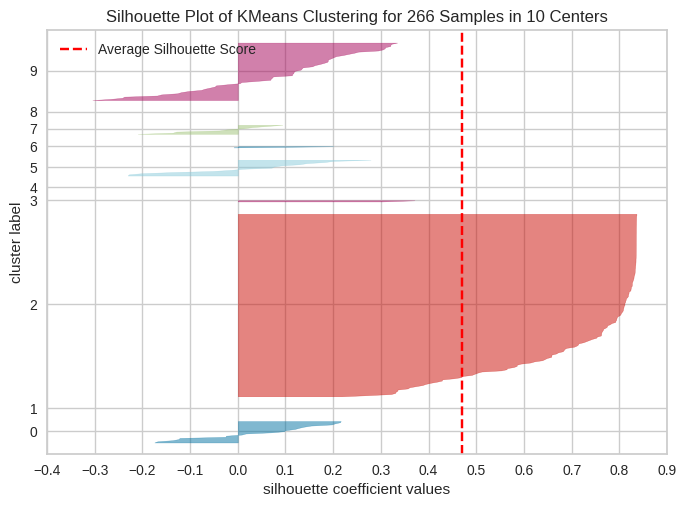

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 266 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=10, random_state=42))

In [71]:
silhouette_visualizer(KMeans(10, random_state=42), scaled_x, colors='yellowbrick')

In [68]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 42
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_x)
    sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'SSE for KMeans cluster range')

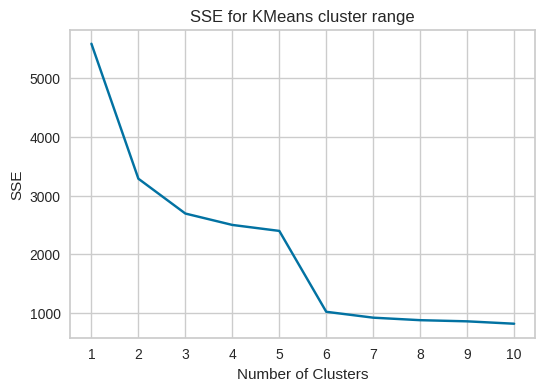

In [70]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("SSE for KMeans cluster range")

In [75]:
country_6_clusters = KMeans(n_clusters=6, random_state=42)

In [76]:
transformed_disbrsmnt_df['kmeans_6'] = country_6_clusters.fit_predict(scaled_x)

In [78]:
country_2_clusters = KMeans(n_clusters=2, random_state=42)

In [79]:
transformed_disbrsmnt_df['kmeans_2'] = country_2_clusters.fit_predict(scaled_x)

In [82]:
six_centers = country_6_clusters.cluster_centers_

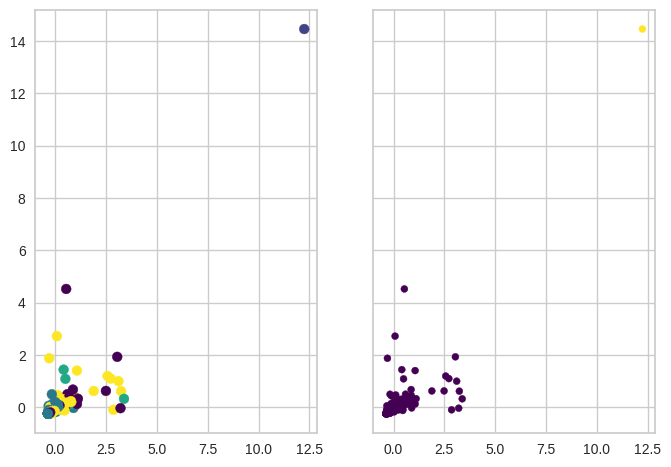

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.scatter(scaled_x[:, 0], scaled_x[:, 1],
            c=transformed_disbrsmnt_df['kmeans_6'], s=50, cmap='viridis')

ax2.scatter(scaled_x[:, 0], scaled_x[:,1], 
           c=transformed_disbrsmnt_df['kmeans_2'], s=25, cmap='viridis')

### Hierarchical clustering

In [112]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [117]:
mergings = linkage(scaled_x, method='ward')

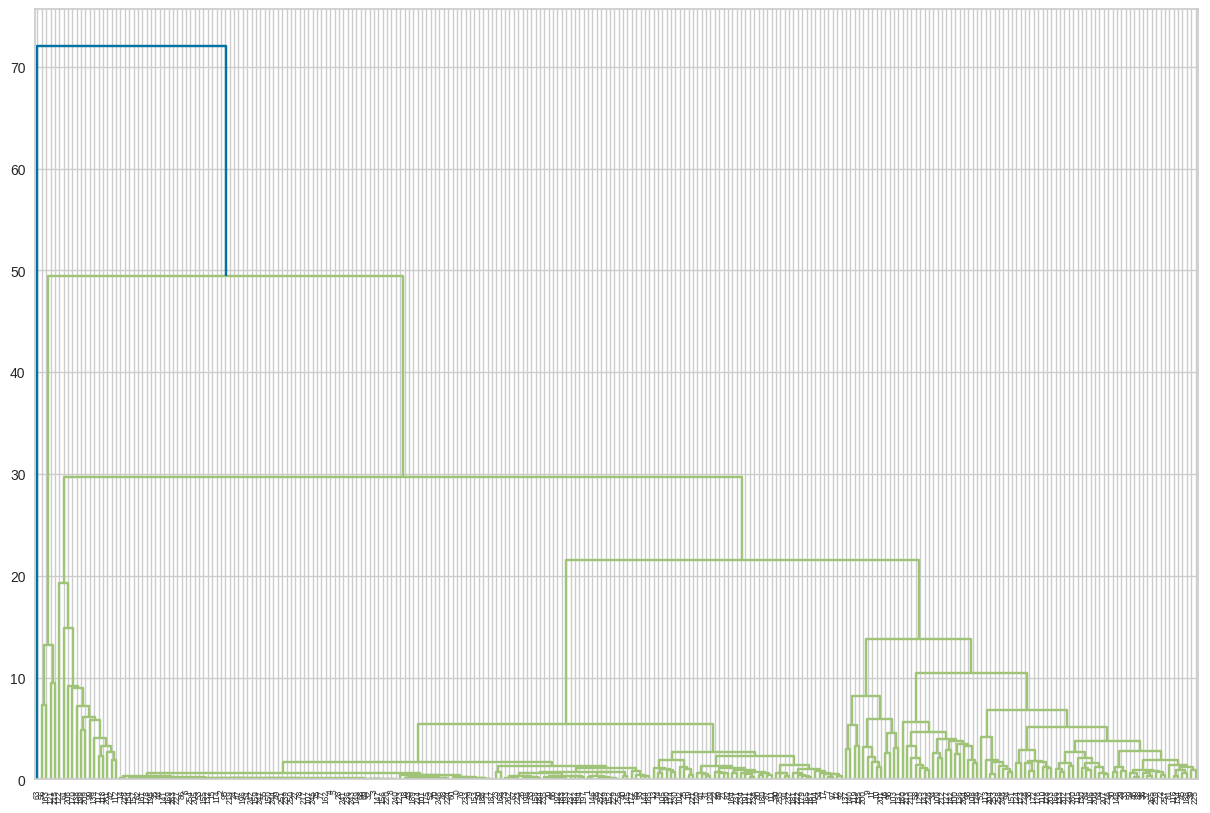

In [118]:
plt.figure(figsize=(15, 10))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

In [125]:
h_clust = AgglomerativeClustering(n_clusters=3, linkage="complete")

In [126]:
transformed_disbrsmnt_df['h_clust_3'] = h_clust.fit_predict(scaled_x)

In [127]:
transformed_disbrsmnt_df['h_clust_3'].value_counts()

0    261
2      4
1      1
Name: h_clust_3, dtype: int64

## Cluster analysis